In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from Preproccessing_Functions import *

In [3]:
train_df=pd.read_excel(r"FlightPrediction\Data_Train.xlsx")
test_df=pd.read_excel(r"FlightPrediction\Test_set.xlsx")

In [5]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
train_df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [14]:
train_df.describe(include="all")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683,10683.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3849,504,4537,4537,2376,233,423,550,5625,8345,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.064121
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.359167
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


In [8]:
train_df.shape

(10683, 11)

In [16]:
test_df.shape

(2671, 10)

In [11]:
train_df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [9]:
train_df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [15]:
test_df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [13]:
train_df.duplicated().sum()

220

In [18]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [19]:
train_df["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [20]:
train_df["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [4]:
train_df["Date_of_Journey"].str.split("/")

0        [24, 03, 2019]
1         [1, 05, 2019]
2         [9, 06, 2019]
3        [12, 05, 2019]
4        [01, 03, 2019]
              ...      
10678     [9, 04, 2019]
10679    [27, 04, 2019]
10680    [27, 04, 2019]
10681    [01, 03, 2019]
10682     [9, 05, 2019]
Name: Date_of_Journey, Length: 10683, dtype: object

In [4]:
train_df["Date_of_Journey"].str.split("/").str[0]

0        24
1         1
2         9
3        12
4        01
         ..
10678     9
10679    27
10680    27
10681    01
10682     9
Name: Date_of_Journey, Length: 10683, dtype: object

In [5]:
train_df["Date_of_Journey"].str.split("/").str[2]

0        2019
1        2019
2        2019
3        2019
4        2019
         ... 
10678    2019
10679    2019
10680    2019
10681    2019
10682    2019
Name: Date_of_Journey, Length: 10683, dtype: object

In [5]:
train_df["Day"]=train_df["Date_of_Journey"].str.split("/").str[0]
train_df["Month"]=train_df["Date_of_Journey"].str.split("/").str[1]
train_df["Year"]=train_df["Date_of_Journey"].str.split("/").str[2]

In [7]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  Day              10683 non-null  object
 12  Month            10683 non-null  object
 13  Year             10683 non-null  object
dtypes: int64(1), object(13)
memory usage: 1.1+ MB


In [7]:
train_df["Day"]=train_df["Day"].astype(int)
train_df["Month"]=train_df["Month"].astype(int)
train_df["Year"]=train_df["Year"].astype(int)

In [8]:
train_df.drop("Date_of_Journey",axis=1,inplace=True)

In [11]:
train_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  Day              10683 non-null  int32 
 11  Month            10683 non-null  int32 
 12  Year             10683 non-null  int32 
dtypes: int32(3), int64(1), object(9)
memory usage: 959.9+ KB


In [9]:
train_df["Dep_Time"].unique()

array(['22:20', '05:50', '09:25', '18:05', '16:50', '09:00', '18:55',
       '08:00', '08:55', '11:25', '09:45', '20:20', '11:40', '21:10',
       '17:15', '16:40', '08:45', '14:00', '20:15', '16:00', '14:10',
       '22:00', '04:00', '21:25', '21:50', '07:00', '07:05', '09:50',
       '14:35', '10:35', '15:05', '14:15', '06:45', '20:55', '11:10',
       '05:45', '19:00', '23:05', '11:00', '09:35', '21:15', '23:55',
       '19:45', '08:50', '15:40', '06:05', '15:00', '13:55', '05:55',
       '13:20', '05:05', '06:25', '17:30', '08:20', '19:55', '06:30',
       '14:05', '02:00', '09:40', '08:25', '20:25', '13:15', '02:15',
       '16:55', '20:45', '05:15', '19:50', '20:00', '06:10', '19:30',
       '04:45', '12:55', '18:15', '17:20', '15:25', '23:00', '12:00',
       '14:45', '11:50', '11:30', '14:40', '19:10', '06:00', '23:30',
       '07:35', '13:05', '12:30', '15:10', '12:50', '18:25', '16:30',
       '00:40', '06:50', '13:00', '19:15', '01:30', '17:00', '10:00',
       '19:35', '15:

In [10]:
train_df["Hour"]=train_df["Dep_Time"].str.split(":").str[0]
train_df["Minutes"]=train_df["Dep_Time"].str.split(":").str[1]

In [14]:
train_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Hour,Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,05,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,09,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50


In [11]:
train_df.drop(["Dep_Time"],axis=1,inplace=True)

In [12]:
train_df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Hour,Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,05,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,09,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50


In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Arrival_Time     10683 non-null  object
 5   Duration         10683 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10683 non-null  object
 8   Price            10683 non-null  int64 
 9   Day              10683 non-null  int32 
 10  Month            10683 non-null  int32 
 11  Year             10683 non-null  int32 
 12  Hour             10683 non-null  object
 13  Minutes          10683 non-null  object
dtypes: int32(3), int64(1), object(10)
memory usage: 1.0+ MB


In [13]:
train_df["Hour"]=train_df["Hour"].astype(int)
train_df["Minutes"]=train_df["Minutes"].astype(int)

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Arrival_Time     10683 non-null  object
 5   Duration         10683 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10683 non-null  object
 8   Price            10683 non-null  int64 
 9   Day              10683 non-null  int32 
 10  Month            10683 non-null  int32 
 11  Year             10683 non-null  int32 
 12  Hour             10683 non-null  int32 
 13  Minutes          10683 non-null  int32 
dtypes: int32(5), int64(1), object(8)
memory usage: 959.9+ KB


In [18]:
train_df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Hour,Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50


In [48]:
train_df["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [49]:
train_df.isna().sum()

Airline            0
Source             0
Destination        0
Route              1
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
Day                0
Month              0
Year               0
Hour               0
Minutes            0
dtype: int64

In [50]:
train_df["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [15]:
mode=train_df["Total_Stops"].mode()[0]

In [16]:
train_df["Total_Stops"]=train_df["Total_Stops"].fillna(mode)

In [17]:
train_df["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [18]:
train_df["Total_Stops"].isnull().sum()

0

In [19]:
train_df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Hour,Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50


In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Arrival_Time     10683 non-null  object
 5   Duration         10683 non-null  object
 6   Total_Stops      10683 non-null  object
 7   Additional_Info  10683 non-null  object
 8   Price            10683 non-null  int64 
 9   Day              10683 non-null  int32 
 10  Month            10683 non-null  int32 
 11  Year             10683 non-null  int32 
 12  Hour             10683 non-null  int32 
 13  Minutes          10683 non-null  int32 
dtypes: int32(5), int64(1), object(8)
memory usage: 959.9+ KB


In [21]:
df_totalstops=pd.get_dummies(train_df["Total_Stops"],drop_first=True)

In [22]:
train_df=pd.concat([train_df,df_totalstops],axis=1)

In [23]:
train_df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Hour,Minutes,2 stops,3 stops,4 stops,non-stop
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20,0,0,0,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50,1,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25,1,0,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5,0,0,0,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50,0,0,0,0


In [74]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Arrival_Time     10683 non-null  object
 5   Duration         10683 non-null  object
 6   Additional_Info  10683 non-null  object
 7   Price            10683 non-null  int64 
 8   Day              10683 non-null  int32 
 9   Month            10683 non-null  int32 
 10  Year             10683 non-null  int32 
 11  Hour             10683 non-null  int32 
 12  Minutes          10683 non-null  int32 
 13  2 stops          10683 non-null  uint8 
 14  3 stops          10683 non-null  uint8 
 15  4 stops          10683 non-null  uint8 
 16  non-stop         10683 non-null  uint8 
dtypes: int32(5), int64(1), object(7

In [24]:
train_df["2 stops"]=train_df["2 stops"].astype(int)
train_df["3 stops"]=train_df["3 stops"].astype(int)
train_df["4 stops"]=train_df["4 stops"].astype(int)
train_df["non-stop"]=train_df["non-stop"].astype(int)

In [25]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Arrival_Time     10683 non-null  object
 5   Duration         10683 non-null  object
 6   Total_Stops      10683 non-null  object
 7   Additional_Info  10683 non-null  object
 8   Price            10683 non-null  int64 
 9   Day              10683 non-null  int32 
 10  Month            10683 non-null  int32 
 11  Year             10683 non-null  int32 
 12  Hour             10683 non-null  int32 
 13  Minutes          10683 non-null  int32 
 14  2 stops          10683 non-null  int32 
 15  3 stops          10683 non-null  int32 
 16  4 stops          10683 non-null  int32 
 17  non-stop         10683 non-null

In [26]:
train_df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Hour,Minutes,2 stops,3 stops,4 stops,non-stop
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20,0,0,0,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50,1,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25,1,0,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5,0,0,0,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50,0,0,0,0


In [27]:
train_df["Arrival_Time"].isnull().sum()

0

In [28]:
train_df["Arrival_Time"]=train_df["Arrival_Time"].str.split(" ").str[0]

In [29]:
train_df["Arrival_Time"].unique()

array(['01:10', '13:15', '04:25', '23:30', '21:35', '11:25', '10:25',
       '05:05', '19:15', '23:00', '22:55', '13:55', '09:20', '19:50',
       '12:35', '19:20', '13:20', '06:50', '21:50', '08:15', '03:35',
       '12:55', '23:15', '21:00', '20:20', '16:45', '19:00', '18:10',
       '15:15', '08:35', '11:05', '14:15', '10:55', '00:15', '02:45',
       '12:00', '23:55', '01:30', '09:25', '15:25', '15:35', '08:30',
       '10:05', '14:30', '07:55', '10:35', '22:35', '04:40', '07:25',
       '20:45', '14:25', '22:30', '23:20', '07:40', '22:50', '14:35',
       '08:55', '18:50', '09:05', '01:35', '09:40', '16:25', '11:10',
       '17:05', '17:50', '23:10', '08:45', '07:45', '16:10', '00:55',
       '23:35', '20:00', '00:40', '21:45', '18:15', '03:25', '04:15',
       '21:10', '21:05', '09:45', '18:05', '22:00', '15:30', '08:50',
       '08:00', '19:35', '11:20', '10:15', '12:45', '02:20', '07:15',
       '11:50', '18:30', '19:45', '21:20', '20:05', '09:10', '22:20',
       '10:10', '01:

In [30]:
train_df["Arrival_Time_Hour"]=train_df["Arrival_Time"].str.split(":").str[0]
train_df["Arrival_Time_Minute"]=train_df["Arrival_Time"].str.split(":").str[1]

In [31]:
train_df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Hour,Minutes,2 stops,3 stops,4 stops,non-stop,Arrival_Time_Hour,Arrival_Time_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10,2h 50m,non-stop,No info,3897,24,3,2019,22,20,0,0,0,1,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50,1,0,0,0,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25,19h,2 stops,No info,13882,9,6,2019,9,25,1,0,0,0,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5,0,0,0,0,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50,0,0,0,0,21,35


In [32]:
train_df.drop(["Arrival_Time"],axis=1,inplace=True)

In [33]:
train_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Hour,Minutes,2 stops,3 stops,4 stops,non-stop,Arrival_Time_Hour,Arrival_Time_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,0,0,0,1,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,1,0,0,0,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,1,0,0,0,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,0,0,0,0,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,0,0,0,0,21,35


In [34]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Airline              10683 non-null  object
 1   Source               10683 non-null  object
 2   Destination          10683 non-null  object
 3   Route                10682 non-null  object
 4   Duration             10683 non-null  object
 5   Total_Stops          10683 non-null  object
 6   Additional_Info      10683 non-null  object
 7   Price                10683 non-null  int64 
 8   Day                  10683 non-null  int32 
 9   Month                10683 non-null  int32 
 10  Year                 10683 non-null  int32 
 11  Hour                 10683 non-null  int32 
 12  Minutes              10683 non-null  int32 
 13  2 stops              10683 non-null  int32 
 14  3 stops              10683 non-null  int32 
 15  4 stops              10683 non-null  int32 
 16  non-

In [35]:
train_df["Arrival_Time_Hour"]=train_df["Arrival_Time_Hour"].astype(int)
train_df["Arrival_Time_Minute"]=train_df["Arrival_Time_Minute"].astype(int)

In [36]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Airline              10683 non-null  object
 1   Source               10683 non-null  object
 2   Destination          10683 non-null  object
 3   Route                10682 non-null  object
 4   Duration             10683 non-null  object
 5   Total_Stops          10683 non-null  object
 6   Additional_Info      10683 non-null  object
 7   Price                10683 non-null  int64 
 8   Day                  10683 non-null  int32 
 9   Month                10683 non-null  int32 
 10  Year                 10683 non-null  int32 
 11  Hour                 10683 non-null  int32 
 12  Minutes              10683 non-null  int32 
 13  2 stops              10683 non-null  int32 
 14  3 stops              10683 non-null  int32 
 15  4 stops              10683 non-null  int32 
 16  non-

In [37]:
train_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Hour,Minutes,2 stops,3 stops,4 stops,non-stop,Arrival_Time_Hour,Arrival_Time_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,0,0,0,1,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,1,0,0,0,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,1,0,0,0,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,0,0,0,0,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,0,0,0,0,21,35


In [38]:
train_df["Dep_Hour"]=train_df["Hour"]

In [39]:
train_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Hour,Minutes,2 stops,3 stops,4 stops,non-stop,Arrival_Time_Hour,Arrival_Time_Minute,Dep_Hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,0,0,0,1,1,10,22
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,1,0,0,0,13,15,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,1,0,0,0,4,25,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,0,0,0,0,23,30,18
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,0,0,0,0,21,35,16


In [40]:
train_df["Dep_Minutes"]=train_df["Minutes"]

In [41]:
train_df.drop(["Minutes","Hour"],axis=1,inplace=True)

In [42]:
train_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,2 stops,3 stops,4 stops,non-stop,Arrival_Time_Hour,Arrival_Time_Minute,Dep_Hour,Dep_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,0,0,0,1,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,1,0,0,0,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,1,0,0,0,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,0,0,0,0,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,0,0,0,0,21,35,16,50


In [43]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Airline              10683 non-null  object
 1   Source               10683 non-null  object
 2   Destination          10683 non-null  object
 3   Route                10682 non-null  object
 4   Duration             10683 non-null  object
 5   Total_Stops          10683 non-null  object
 6   Additional_Info      10683 non-null  object
 7   Price                10683 non-null  int64 
 8   Day                  10683 non-null  int32 
 9   Month                10683 non-null  int32 
 10  Year                 10683 non-null  int32 
 11  2 stops              10683 non-null  int32 
 12  3 stops              10683 non-null  int32 
 13  4 stops              10683 non-null  int32 
 14  non-stop             10683 non-null  int32 
 15  Arrival_Time_Hour    10683 non-null  int32 
 16  Arri

In [44]:
train_df["Destination"].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [45]:
lst_Destination=list(train_df["Destination"].value_counts().sort_values(ascending=False).head(10).index)

In [46]:
lst_Destination

['Cochin', 'Banglore', 'Delhi', 'New Delhi', 'Hyderabad', 'Kolkata']

In [47]:
for i in lst_Destination:
    train_df[i]=np.where(train_df["Destination"]==i,1,0)

In [48]:
lst_Destination.append("Destination")

In [49]:
train_df[lst_Destination]

,Cochin,Banglore,Delhi,New Delhi,Hyderabad,Kolkata,Destination
0,0,0,0,1,0,0,New Delhi
1,0,1,0,0,0,0,Banglore
2,1,0,0,0,0,0,Cochin
3,0,1,0,0,0,0,Banglore
4,0,0,0,1,0,0,New Delhi
...,...,...,...,...,...,...,...
10678,0,1,0,0,0,0,Banglore
10679,0,1,0,0,0,0,Banglore
10680,0,0,1,0,0,0,Delhi
10681,0,0,0,1,0,0,New Delhi


In [50]:
train_df.drop(["Destination"],axis=1,inplace=True)

In [51]:
train_df.head()

,Airline,Source,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,...,Arrival_Time_Hour,Arrival_Time_Minute,Dep_Hour,Dep_Minutes,Cochin,Banglore,Delhi,New Delhi,Hyderabad,Kolkata
0,IndiGo,Banglore,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,...,1,10,22,20,0,0,0,1,0,0
1,Air India,Kolkata,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,...,13,15,5,50,0,1,0,0,0,0
2,Jet Airways,Delhi,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,...,4,25,9,25,1,0,0,0,0,0
3,IndiGo,Kolkata,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,...,23,30,18,5,0,1,0,0,0,0
4,IndiGo,Banglore,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,...,21,35,16,50,0,0,0,1,0,0


In [52]:
lst_Source=list(train_df["Source"].value_counts().sort_values(ascending=False).head(10).index)

In [53]:
lst_Source

['Delhi', 'Kolkata', 'Banglore', 'Mumbai', 'Chennai']

In [54]:
for j in lst_Source:
    train_df[j]=np.where(train_df["Source"]==j,1,0)

In [55]:
lst_Source.append("Source")

In [56]:
train_df[lst_Source]

,Delhi,Kolkata,Banglore,Mumbai,Chennai,Source
0,0,0,1,0,0,Banglore
1,0,1,0,0,0,Kolkata
2,1,0,0,0,0,Delhi
3,0,1,0,0,0,Kolkata
4,0,0,1,0,0,Banglore
...,...,...,...,...,...,...
10678,0,1,0,0,0,Kolkata
10679,0,1,0,0,0,Kolkata
10680,0,0,1,0,0,Banglore
10681,0,0,1,0,0,Banglore


In [59]:
train_df.drop(["Source"],inplace=True,axis=1)

KeyError: "['Source'] not found in axis"

In [60]:
train_df.head()

,Airline,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,2 stops,...,Dep_Hour,Dep_Minutes,Cochin,Banglore,Delhi,New Delhi,Hyderabad,Kolkata,Mumbai,Chennai
0,IndiGo,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,0,...,22,20,0,1,0,1,0,0,0,0
1,Air India,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,1,...,5,50,0,0,0,0,0,1,0,0
2,Jet Airways,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,1,...,9,25,1,0,1,0,0,0,0,0
3,IndiGo,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,0,...,18,5,0,0,0,0,0,1,0,0
4,IndiGo,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,0,...,16,50,0,1,0,1,0,0,0,0


In [61]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Airline              10683 non-null  object
 1   Route                10682 non-null  object
 2   Duration             10683 non-null  object
 3   Total_Stops          10683 non-null  object
 4   Additional_Info      10683 non-null  object
 5   Price                10683 non-null  int64 
 6   Day                  10683 non-null  int32 
 7   Month                10683 non-null  int32 
 8   Year                 10683 non-null  int32 
 9   2 stops              10683 non-null  int32 
 10  3 stops              10683 non-null  int32 
 11  4 stops              10683 non-null  int32 
 12  non-stop             10683 non-null  int32 
 13  Arrival_Time_Hour    10683 non-null  int32 
 14  Arrival_Time_Minute  10683 non-null  int32 
 15  Dep_Hour             10683 non-null  int32 
 16  Dep_

In [62]:
lst_Airlines=list(train_df["Airline"].value_counts().sort_values(ascending=False).head(10).index)

In [63]:
for k in lst_Airlines:
    train_df[k]=np.where(train_df["Airline"]==k,1,0)

In [64]:
lst_Airlines.append("Airline")

In [65]:
train_df[lst_Airlines]

,Jet Airways,IndiGo,Air India,Multiple carriers,SpiceJet,Vistara,Air Asia,GoAir,Multiple carriers Premium economy,Jet Airways Business,Airline
0,0,1,0,0,0,0,0,0,0,0,IndiGo
1,0,0,1,0,0,0,0,0,0,0,Air India
2,1,0,0,0,0,0,0,0,0,0,Jet Airways
3,0,1,0,0,0,0,0,0,0,0,IndiGo
4,0,1,0,0,0,0,0,0,0,0,IndiGo
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,1,0,0,0,Air Asia
10679,0,0,1,0,0,0,0,0,0,0,Air India
10680,1,0,0,0,0,0,0,0,0,0,Jet Airways
10681,0,0,0,0,0,1,0,0,0,0,Vistara


In [66]:
train_df.drop(["Airline"],axis=1,inplace=True)

In [67]:
train_df.head()

,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,2 stops,3 stops,...,Jet Airways,IndiGo,Air India,Multiple carriers,SpiceJet,Vistara,Air Asia,GoAir,Multiple carriers Premium economy,Jet Airways Business
0,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,0,0,...,0,1,0,0,0,0,0,0,0,0
1,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,1,0,...,0,0,1,0,0,0,0,0,0,0
2,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,1,0,...,1,0,0,0,0,0,0,0,0,0
3,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,0,0,...,0,1,0,0,0,0,0,0,0,0
4,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,0,0,...,0,1,0,0,0,0,0,0,0,0


In [68]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Route                              10682 non-null  object
 1   Duration                           10683 non-null  object
 2   Total_Stops                        10683 non-null  object
 3   Additional_Info                    10683 non-null  object
 4   Price                              10683 non-null  int64 
 5   Day                                10683 non-null  int32 
 6   Month                              10683 non-null  int32 
 7   Year                               10683 non-null  int32 
 8   2 stops                            10683 non-null  int32 
 9   3 stops                            10683 non-null  int32 
 10  4 stops                            10683 non-null  int32 
 11  non-stop                           10683 non-null  int32 
 12  Arri

In [69]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [70]:
train_df["Additional_Info"]=labelencoder.fit_transform(train_df["Additional_Info"])

In [71]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Route                              10682 non-null  object
 1   Duration                           10683 non-null  object
 2   Total_Stops                        10683 non-null  object
 3   Additional_Info                    10683 non-null  int32 
 4   Price                              10683 non-null  int64 
 5   Day                                10683 non-null  int32 
 6   Month                              10683 non-null  int32 
 7   Year                               10683 non-null  int32 
 8   2 stops                            10683 non-null  int32 
 9   3 stops                            10683 non-null  int32 
 10  4 stops                            10683 non-null  int32 
 11  non-stop                           10683 non-null  int32 
 12  Arri

In [72]:
train_df.head()

,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,2 stops,3 stops,...,Jet Airways,IndiGo,Air India,Multiple carriers,SpiceJet,Vistara,Air Asia,GoAir,Multiple carriers Premium economy,Jet Airways Business
0,BLR → DEL,2h 50m,non-stop,8,3897,24,3,2019,0,0,...,0,1,0,0,0,0,0,0,0,0
1,CCU → IXR → BBI → BLR,7h 25m,2 stops,8,7662,1,5,2019,1,0,...,0,0,1,0,0,0,0,0,0,0
2,DEL → LKO → BOM → COK,19h,2 stops,8,13882,9,6,2019,1,0,...,1,0,0,0,0,0,0,0,0,0
3,CCU → NAG → BLR,5h 25m,1 stop,8,6218,12,5,2019,0,0,...,0,1,0,0,0,0,0,0,0,0
4,BLR → NAG → DEL,4h 45m,1 stop,8,13302,1,3,2019,0,0,...,0,1,0,0,0,0,0,0,0,0


In [73]:
train_df.drop(["Total_Stops"],axis=1,inplace=True)

In [74]:
final_df.head()

NameError: name 'final_df' is not defined

In [78]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Route                              10682 non-null  object
 1   Duration                           10683 non-null  object
 2   Additional_Info                    10683 non-null  int64 
 3   Price                              10683 non-null  int64 
 4   Month                              10683 non-null  int32 
 5   Year                               10683 non-null  int32 
 6   2 stops                            10683 non-null  int32 
 7   3 stops                            10683 non-null  int32 
 8   4 stops                            10683 non-null  int32 
 9   non-stop                           10683 non-null  int32 
 10  Arrival_Time_Hour                  10683 non-null  int32 
 11  Arrival_Time_Minute                10683 non-null  int32 
 12  Dep_

In [75]:
train_df.head()

,Route,Duration,Additional_Info,Price,Day,Month,Year,2 stops,3 stops,4 stops,...,Jet Airways,IndiGo,Air India,Multiple carriers,SpiceJet,Vistara,Air Asia,GoAir,Multiple carriers Premium economy,Jet Airways Business
0,BLR → DEL,2h 50m,8,3897,24,3,2019,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,CCU → IXR → BBI → BLR,7h 25m,8,7662,1,5,2019,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,DEL → LKO → BOM → COK,19h,8,13882,9,6,2019,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,CCU → NAG → BLR,5h 25m,8,6218,12,5,2019,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,BLR → NAG → DEL,4h 45m,8,13302,1,3,2019,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [76]:
train_df["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [77]:
train_df["Duration_Hours"]=train_df["Duration"].apply(lambda x: x.split("h")[0])

In [78]:
train_df["Duration_Hours"]=train_df["Duration_Hours"].astype(int)

ValueError: invalid literal for int() with base 10: '5m'

In [79]:
train_df.drop(6474,axis=0,inplace=True)

In [80]:
train_df[train_df["Duration_Hours"]=="5m"]

,Route,Duration,Additional_Info,Price,Day,Month,Year,2 stops,3 stops,4 stops,...,IndiGo,Air India,Multiple carriers,SpiceJet,Vistara,Air Asia,GoAir,Multiple carriers Premium economy,Jet Airways Business,Duration_Hours


In [81]:
train_df.head()

,Route,Duration,Additional_Info,Price,Day,Month,Year,2 stops,3 stops,4 stops,...,IndiGo,Air India,Multiple carriers,SpiceJet,Vistara,Air Asia,GoAir,Multiple carriers Premium economy,Jet Airways Business,Duration_Hours
0,BLR → DEL,2h 50m,8,3897,24,3,2019,0,0,0,...,1,0,0,0,0,0,0,0,0,2
1,CCU → IXR → BBI → BLR,7h 25m,8,7662,1,5,2019,1,0,0,...,0,1,0,0,0,0,0,0,0,7
2,DEL → LKO → BOM → COK,19h,8,13882,9,6,2019,1,0,0,...,0,0,0,0,0,0,0,0,0,19
3,CCU → NAG → BLR,5h 25m,8,6218,12,5,2019,0,0,0,...,1,0,0,0,0,0,0,0,0,5
4,BLR → NAG → DEL,4h 45m,8,13302,1,3,2019,0,0,0,...,1,0,0,0,0,0,0,0,0,4


In [82]:
train_df.drop(["Duration"],axis=1,inplace=True)

In [83]:
train_df.head()

,Route,Additional_Info,Price,Day,Month,Year,2 stops,3 stops,4 stops,non-stop,...,IndiGo,Air India,Multiple carriers,SpiceJet,Vistara,Air Asia,GoAir,Multiple carriers Premium economy,Jet Airways Business,Duration_Hours
0,BLR → DEL,8,3897,24,3,2019,0,0,0,1,...,1,0,0,0,0,0,0,0,0,2
1,CCU → IXR → BBI → BLR,8,7662,1,5,2019,1,0,0,0,...,0,1,0,0,0,0,0,0,0,7
2,DEL → LKO → BOM → COK,8,13882,9,6,2019,1,0,0,0,...,0,0,0,0,0,0,0,0,0,19
3,CCU → NAG → BLR,8,6218,12,5,2019,0,0,0,0,...,1,0,0,0,0,0,0,0,0,5
4,BLR → NAG → DEL,8,13302,1,3,2019,0,0,0,0,...,1,0,0,0,0,0,0,0,0,4


In [84]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Route                              10681 non-null  object
 1   Additional_Info                    10682 non-null  int32 
 2   Price                              10682 non-null  int64 
 3   Day                                10682 non-null  int32 
 4   Month                              10682 non-null  int32 
 5   Year                               10682 non-null  int32 
 6   2 stops                            10682 non-null  int32 
 7   3 stops                            10682 non-null  int32 
 8   4 stops                            10682 non-null  int32 
 9   non-stop                           10682 non-null  int32 
 10  Arrival_Time_Hour                  10682 non-null  int32 
 11  Arrival_Time_Minute                10682 non-null  int32 
 12  Dep_

In [85]:
train_df["Duration_Hours"]=train_df["Duration_Hours"].astype(int)

In [103]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Route                              10681 non-null  object
 1   Additional_Info                    10682 non-null  int64 
 2   Price                              10682 non-null  int64 
 3   Month                              10682 non-null  int32 
 4   Year                               10682 non-null  int32 
 5   2 stops                            10682 non-null  int32 
 6   3 stops                            10682 non-null  int32 
 7   4 stops                            10682 non-null  int32 
 8   non-stop                           10682 non-null  int32 
 9   Arrival_Time_Hour                  10682 non-null  int32 
 10  Arrival_Time_Minute                10682 non-null  int32 
 11  Dep_Hour                           10682 non-null  int32 
 12  Dep_

In [86]:
train_df.drop(["Route"],inplace=True,axis=1)

In [87]:
train_df.head()

,Additional_Info,Price,Day,Month,Year,2 stops,3 stops,4 stops,non-stop,Arrival_Time_Hour,...,IndiGo,Air India,Multiple carriers,SpiceJet,Vistara,Air Asia,GoAir,Multiple carriers Premium economy,Jet Airways Business,Duration_Hours
0,8,3897,24,3,2019,0,0,0,1,1,...,1,0,0,0,0,0,0,0,0,2
1,8,7662,1,5,2019,1,0,0,0,13,...,0,1,0,0,0,0,0,0,0,7
2,8,13882,9,6,2019,1,0,0,0,4,...,0,0,0,0,0,0,0,0,0,19
3,8,6218,12,5,2019,0,0,0,0,23,...,1,0,0,0,0,0,0,0,0,5
4,8,13302,1,3,2019,0,0,0,0,21,...,1,0,0,0,0,0,0,0,0,4


In [109]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Additional_Info                    10682 non-null  int64
 1   Price                              10682 non-null  int64
 2   Month                              10682 non-null  int32
 3   Year                               10682 non-null  int32
 4   2 stops                            10682 non-null  int32
 5   3 stops                            10682 non-null  int32
 6   4 stops                            10682 non-null  int32
 7   non-stop                           10682 non-null  int32
 8   Arrival_Time_Hour                  10682 non-null  int32
 9   Arrival_Time_Minute                10682 non-null  int32
 10  Dep_Hour                           10682 non-null  int32
 11  Dep_Minutes                        10682 non-null  int32
 12  Cochin            

In [88]:
train_df.columns

Index(['Additional_Info', 'Price', 'Day', 'Month', 'Year', '2 stops',
       '3 stops', '4 stops', 'non-stop', 'Arrival_Time_Hour',
       'Arrival_Time_Minute', 'Dep_Hour', 'Dep_Minutes', 'Cochin', 'Banglore',
       'Delhi', 'New Delhi', 'Hyderabad', 'Kolkata', 'Mumbai', 'Chennai',
       'Jet Airways', 'IndiGo', 'Air India', 'Multiple carriers', 'SpiceJet',
       'Vistara', 'Air Asia', 'GoAir', 'Multiple carriers Premium economy',
       'Jet Airways Business', 'Duration_Hours'],
      dtype='object')

In [89]:
#Outliers
train_df["Dep_Hour"].mean()

12.490357610934282

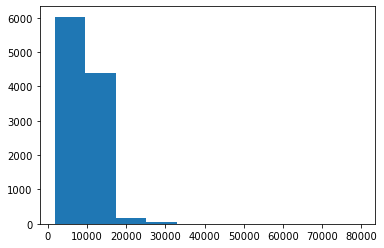

In [95]:
plt.hist("Price",data=train_df)
plt.show()

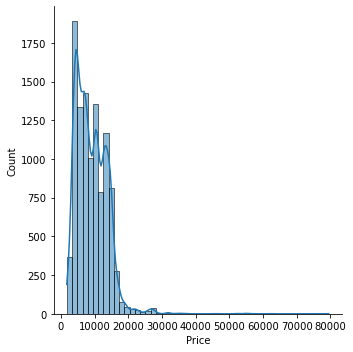

In [101]:
sns.displot(train_df["Price"],bins=50,kde=True)

c:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

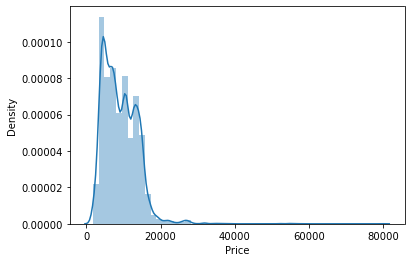

In [100]:
sns.distplot(train_df["Price"],bins=50)

c:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

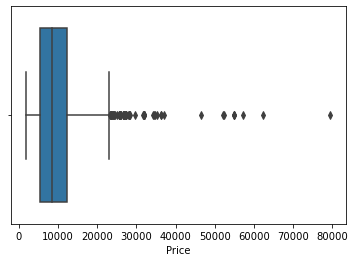

In [102]:
sns.boxplot("Price",data=train_df)

In [ ]:
# dropping outiers rows with Percentiles

# uplimit = train_df['Price'].quantile(0.95)
# lowlimit = train_df['Price'].quantile(0.05)

#better is Outliers using std
# Drop or Cap


# ===> Cap
#train.loc[train['Price']>upperLimit,'Price'] = upperLimit




In [104]:
upperlimit=train_df["Price"].mean()+3*train_df["Price"].std()
lowerlimit=train_df["Price"].mean()-3*train_df["Price"].std()


In [111]:
train_df.loc[train_df["Price"]>upperlimit,"Price"]=upperlimit

c:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

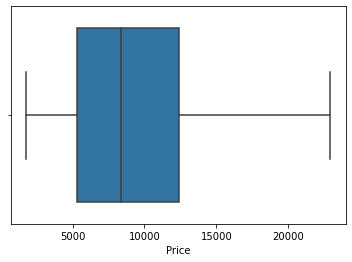

In [112]:
sns.boxplot("Price",data=train_df)

In [116]:
train_df.loc[train_df["Price"]>=upperlimit,"Price"]

123      22918.949821
396      22918.949821
486      22918.949821
510      22918.949821
597      22918.949821
             ...     
10353    22918.949821
10364    22918.949821
10383    22918.949821
10439    22918.949821
10511    22918.949821
Name: Price, Length: 96, dtype: float64

(array([ 987., 2175., 2043., 1229., 1518., 1519.,  811.,  199.,   65.,
         136.]),
 array([ 1759.        ,  3874.99498214,  5990.98996429,  8106.98494643,
        10222.97992857, 12338.97491071, 14454.96989286, 16570.964875  ,
        18686.95985714, 20802.95483929, 22918.94982143]),
 <BarContainer object of 10 artists>)

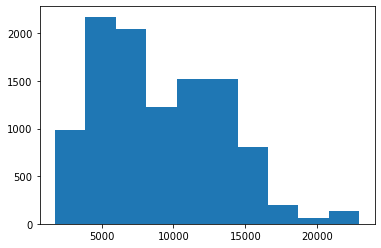

In [118]:
plt.hist("Price",data=train_df)

In [119]:
train_df["Price"].max()

22918.94982142857

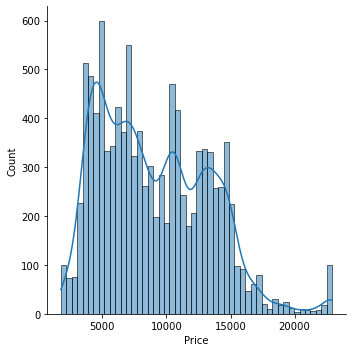

In [120]:
sns.displot(train_df["Price"],bins=50,kde=True)

In [123]:
from sklearn.preprocessing import StandardScaler
standardscaler=StandardScaler()
updated_train_df=standardscaler.fit_transform(train_df)

In [125]:
pd.DataFrame(updated_train_df,columns=train_df.columns)

,Additional_Info,Price,Day,Month,Year,2 stops,3 stops,4 stops,non-stop,Arrival_Time_Hour,...,IndiGo,Air India,Multiple carriers,SpiceJet,Vistara,Air Asia,GoAir,Multiple carriers Premium economy,Jet Airways Business,Duration_Hours
0,0.499921,-1.203553,1.237288,-1.467707,0.0,-0.407155,-0.065042,-0.009676,1.435224,-1.800319,...,2.050151,-0.442785,-0.355078,-0.287972,-0.216673,-0.17545,-0.136005,-0.034907,-0.023707,-0.970831
1,0.499921,-0.319079,-1.475307,0.250153,0.0,2.456066,-0.065042,-0.009676,-0.696755,-0.050813,...,-0.487769,2.258432,-0.355078,-0.287972,-0.216673,-0.17545,-0.136005,-0.034907,-0.023707,-0.382238
2,0.499921,1.142123,-0.531796,1.109082,0.0,2.456066,-0.065042,-0.009676,-0.696755,-1.362943,...,-0.487769,-0.442785,-0.355078,-0.287972,-0.216673,-0.17545,-0.136005,-0.034907,-0.023707,1.030385
3,0.499921,-0.658304,-0.177979,0.250153,0.0,-0.407155,-0.065042,-0.009676,-0.696755,1.407109,...,2.050151,-0.442785,-0.355078,-0.287972,-0.216673,-0.17545,-0.136005,-0.034907,-0.023707,-0.617675
4,0.499921,1.005869,-1.475307,-1.467707,0.0,-0.407155,-0.065042,-0.009676,-0.696755,1.115525,...,2.050151,-0.442785,-0.355078,-0.287972,-0.216673,-0.17545,-0.136005,-0.034907,-0.023707,-0.735394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,0.499921,-1.154220,-0.531796,-0.608777,0.0,-0.407155,-0.065042,-0.009676,1.435224,1.261317,...,-0.487769,-0.442785,-0.355078,-0.287972,-0.216673,5.69964,-0.136005,-0.034907,-0.023707,-0.970831
10678,0.499921,-1.145293,1.591104,-0.608777,0.0,-0.407155,-0.065042,-0.009676,1.435224,1.407109,...,-0.487769,2.258432,-0.355078,-0.287972,-0.216673,-0.17545,-0.136005,-0.034907,-0.023707,-0.970831
10679,0.499921,-0.420800,1.591104,-0.608777,0.0,-0.407155,-0.065042,-0.009676,1.435224,-0.342397,...,-0.487769,-0.442785,-0.355078,-0.287972,-0.216673,-0.17545,-0.136005,-0.034907,-0.023707,-0.853113
10680,0.499921,0.852232,-1.475307,-1.467707,0.0,-0.407155,-0.065042,-0.009676,1.435224,0.094979,...,-0.487769,-0.442785,-0.355078,-0.287972,4.615260,-0.17545,-0.136005,-0.034907,-0.023707,-0.970831
